In [1]:
import src.Img2Off.I2Osrc.CURVE as CURVE

In [2]:
for i in range(25):
    df=CURVE.random_bcrv_csv(400,4,path='io/0_Curves/')


In [3]:
import os
import pandas as pd
def judge_file(file):
    #return true if in csv Y1<Y2<...<Yn
    df=pd.read_csv('io/0_Curves/'+file)
    df=df.drop(columns=['X'+str(i+1) for i in range(4)])
    df=df.drop(columns=['ID'])
    df=df.drop(columns=['Order'])
    for i in range(1,df.shape[0]):
        y = ['Y'+str(j+1) for j in range(4)]
        for j in range(3):
            if df[y[j]][i]>df[y[j+1]][i]:
                #print row
                print(i," ",df.iloc[i])
                return False
    return True

for file in os.listdir('io/0_Curves/'):
    print(judge_file(file))


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [16]:
import matplotlib.pyplot as plt
curves = CURVE.read_bcrv('io/0_Curves/bcurve001.csv')

Curve ID: 10001
103
103
Curve ID: 10045
103
103
Curve ID: 10035
103
103
Curve ID: 10003
103
103


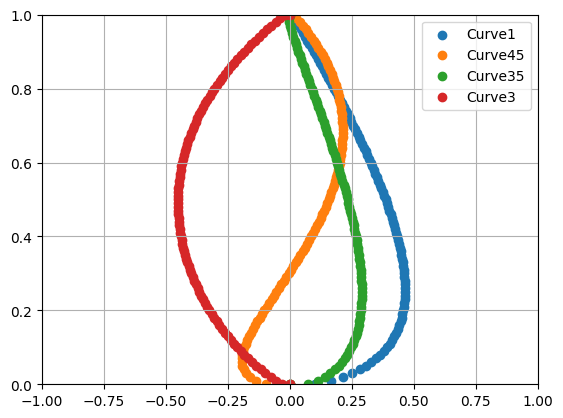

In [17]:
import numpy as np
n = 101
id = [1 ,45, 35, 3]
for i in range(4):
    curve = curves[id[i]-1]
    num = curve[0]
    num_str = str(num).zfill(5)
    print('Curve ID:', num_str)
    pts = curve[1]
    print(len(pts))
    y_value = []
    y_value.append(0.0)
    y = np.linspace(0, 1, n)
    for j in range(len(y)):
        y_value.append(y[j])
    y_value.append(1.0)
    print(len(y_value))
    plt.xlim(-1, 1)
    plt.ylim(0, 1)
    plt.scatter(pts,y_value,label='Curve'+str(id[i]))
    plt.legend()
    plt.grid(True)

In [18]:
import pandas as pd
df = pd.read_csv('io/0_Curves/bcurve001.csv')
bcurves = []
for i in range(4):
    Curve_ID = df['ID'][id[i]-1]
    Curve_Order = df['Order'][id[i]-1]
    control_points = []
    for j in range(Curve_Order):
        control_points.append([df['X'+str(j+1)][id[i]-1], df['Y'+str(j+1)][id[i]-1]])
    bcurve = CURVE.BCurve(n=Curve_Order, control_points=control_points, id=Curve_ID)
    bcurves.append(bcurve)

In [19]:
def plot(self):
    print("Control Points Structure:", self.control_points)
    if self.bezier_curve is None:
        self.parameterize_curve()

    # Plot the bezier curve
    if self.id:
        plt.plot(self.bezier_curve[0], self.bezier_curve[1], label=f'Bezier Curve {self.id}')
        plt.scatter(*zip(*self.control_points), label=f'Control Points {self.id}')
    else:
        plt.plot(self.bezier_curve[0], self.bezier_curve[1], label='Bezier Curve')
        plt.scatter(*zip(*self.control_points), label='Control Points')
    plt.xlim(-1, 1)
    plt.ylim(0, 1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Random Bezier Curve')
    plt.legend()
    plt.grid(True)

Control Points Structure: [[0, 0], [0.6197332324415215, 0.0407303568654512], [0.6190347903994473, 0.323823913697518], [0, 1]]
Control Points Structure: [[0, 0], [-0.6849313453957995, 0.0354887085939482], [0.7251502040023972, 0.4941502046955509], [0, 1]]
Control Points Structure: [[0, 0], [0.6878710463202302, 0.0543253865747181], [-0.0720171195433221, 0.9604803211506812], [0, 1]]
Control Points Structure: [[0, 0], [-0.3201735164560355, 0.0973659299788652], [-0.8302435888032349, 0.5810664563339283], [0, 1]]


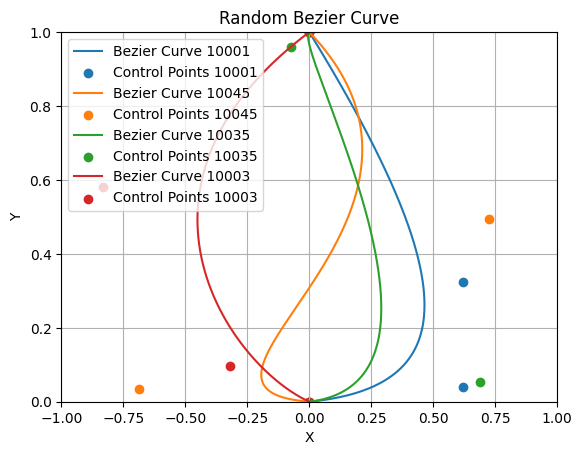

In [20]:
for bcurve in bcurves:
    plot(bcurve)

In [15]:
#change ID in csv file
curve_dir = 'io/0_Curves/'
for csv in os.listdir(curve_dir):
    df = pd.read_csv(curve_dir + csv)
    #find number in csv filename ex. bcurve034.csv => num = 34
    num = int(csv[6:9])
    #edit ID in csv, change ID to zfill(num,4)+zfill(original ID,4)
    df['ID'] = df['ID'].apply(lambda x: str(num).zfill(4)+str(x).zfill(4))
    df.to_csv(curve_dir + csv, index=False)
